# Project: Wrangling and Analyze Data

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [179]:
#importing liabaries
import requests
import pandas as pd
import tweepy
import json
from timeit import default_timer as timer

In [180]:
#opening tweet jason file
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
data = [ ]
for line in lines:
    data.append(json.loads(line))
data_json = pd.DataFrame(data)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [181]:
#putting twitter archive in into a dataframe
df = pd.read_csv('twitter-archive-enhanced.csv')

In [182]:
#set the notebook display to show all rows
pd.set_option('display.max_rows', None)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [183]:
#requesting image predictions file use requests library and storing into image predictions dataframe
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
file =  open('image-predictions.tsv',"wb")
file.write(response.content)
file.close()
image_predictions = pd.read_csv('image-predictions.tsv',
                                sep = "\t")

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.



In [184]:
#inspecting columns to see if the names are not written in different formatting
df[['doggo','puppo','pupper','floofer']].apply(pd.Series.value_counts)

,doggo,puppo,pupper,floofer
None,2259.0,2326.0,2099.0,2346.0
doggo,97.0,NaN,NaN,NaN
floofer,NaN,NaN,NaN,10.0
pupper,NaN,NaN,257.0,NaN
puppo,NaN,30.0,NaN,NaN


In [185]:
#inspecting the name columns for dog names
df[['name']].apply(pd.Series.value_counts)

,name
None,745
a,55
Charlie,12
Cooper,11
Lucy,11
Oliver,11
Tucker,10
Penny,10
Lola,10
Winston,9


There are missing values in the name column (Quality Issue) 745 of the names in the name column have none, meaning that they are missing .55 of the dogs have the name a, while 7 have the name 'an' and 8 have the name 'the' which is cleary due to capturing erros.

In [186]:
#inspecting the number of missing values.
df.isnull().sum() 

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

Missing values Missing values in the df dataframe, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp have 2175 missing values.

In [187]:
#Showing all duplicated rows in the dataframe.
df.loc[df.duplicated(), :] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


From the code above there are no duplicated rows

In [188]:
image_predictions.p1.value_counts(ascending=False)

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
cocker_spaniel                     30
malamute                           30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
Siberian_husky                     20
German_shepherd                    20
Staffordshire_bullterrier          20
Cardigan                           19
web_site                           19
Eskimo_dog                         18
Maltese_dog                        18
Shetland_sheepdog                  18
teddy                              18
beagle                             18
Lakeland_terrier                   17
Rottweiler  

P1 includes items and animals that are not dogs in the image_predictions dataframe.

In the image predictions some of the dogs are shown as odinary household items and not dogs.



In [189]:
#inspecting the object types in the dataframe
df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

Timestamp column is a string and not timestamp format.

In [190]:
data_json.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

The data_json dataframe has columns with a lot of missing values, for example in_reply_to_status_id has 2276 missing entries

In [191]:
#inspecting the rating values
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

There seems to be capturing errors in the ratings above, as dogs are rated on scale of 1 to 10 with some dogs recieving ratings above 10, but never as large as numbers as 204. These should be decimal values.

id needs to be renamed to tweet_id in order to for it to be the same as the other dataframes

### Quality issues
1.Doggo, Puppo, Fluffer and Pupper could be included in one column for type of dog, the dog types also have mixed entries which can be classified as mixed

2.id in the data_json dataframe needs to be renamed to tweet_id to reflect the same heading as the other datasets

3.The dataset contains retweeted tweets which should be removed from the dataset

4.p1 includes items and animals that are not dogs - The classification includes dogs and items that are not dogs in the image_predictions dataframe.

5.retweeted_status_id (Quality Issue) - The data has 2356 total values, 2278 values are missing. This represents 96% of the values in the dataframe.

6.Doggo,Puppo - From the information above we can see there is a lot of missing values, as doggo has 97 values, floofer has 10 values and pupper has 257 values, and puppo has 30 values. In total there are 2466 entries this shows a lot of data is missing for these categories.

7.Classification includes items and animals that are not dogs - The classification includes dogs and items that are not dogs in the image_predictions dataframe.

8.Timestamp column is a string and not a timestamp

### Tidiness issues

1. Doggo, Puppo, Fluffer and Pupper could be included in one column for type of dog.

2. The datasets are part of the same obeservational unit and should therefore be merged into one dataset

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 


In [192]:
# Make copies of original pieces of data
df_copy = df.copy()
data_json_copy = data_json.copy
image_predictions_copy = image_predictions.copy()

### Issue #1:

#### Doggo, Puppo, Fluffer and Pupper could be included in one column for type of dog, the dog types also have mixed entries which can be classified as mixed

#### Code

In [193]:
#Replacing all none columns in df with empty space
for i in df.columns:
    df[i].replace('None', " ",inplace=True)

In [194]:
#adding all values into one column
df['doggo'] = df['doggo'] + df['floofer'] + df['pupper'] + df['puppo']

In [195]:
#removing blank spaces
df['doggo'] = df.doggo.str.strip()

In [196]:
#renaming doggo column to reflect all values
df.rename(columns = {'doggo':'dog_types'},inplace = True)

In [197]:
#dropping additional columns that are not needed in the dataset
df.drop(['floofer','pupper','puppo'],axis=1,inplace=True)

In [198]:
mixed_dogs = ['doggo pupper','doggo  puppo','doggofloofer']

In [199]:
for i in mixed_dogs:
    df['dog_types'].replace([i],'mixed',inplace=True)

#### Test

In [154]:
#programmatically testing that the column is included in df
assert 'dog_types' in df.columns

In [155]:
#visually assessing list has been fixed for mixed dogs
df.dog_types.value_counts()

           1976
pupper      245
doggo        83
puppo        29
mixed        14
floofer       9
Name: dog_types, dtype: int64

### Issue #2:

#### id in the data_json dataframe needs to be renamed to tweet_id to reflect the same heading as the other datasets

#### Code

In [202]:
#renaming id column to the same as the other datasets
data_json.rename(columns = {'id':'tweet_id'},inplace = True)

#### Test

In [203]:
#programmatically testing that the column is included in df
assert 'tweet_id' in data_json.columns

### Issue #3:

#### The dataset contains retweeted tweets which should be removed from the dataset

#### Code

In [204]:
#removing retweeted statuses in data_json dataframe
data_json = data_json[pd.isnull(data_json.in_reply_to_status_id)]
data_json = data_json[pd.isnull(data_json.retweeted_status)]

In [205]:
#removing retweeted statuses in df dataframe
df = df[pd.isnull(df.in_reply_to_status_id)]
df = df[pd.isnull(df.retweeted_status_id)]

#### Test

In [206]:
#visually assessing that retweets have been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  dog_types                   2097 

In [207]:
#visually assessing that retweets have been dropped
data_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2097 non-null   object 
 1   tweet_id                       2097 non-null   int64  
 2   id_str                         2097 non-null   object 
 3   full_text                      2097 non-null   object 
 4   truncated                      2097 non-null   bool   
 5   display_text_range             2097 non-null   object 
 6   entities                       2097 non-null   object 
 7   extended_entities              1971 non-null   object 
 8   source                         2097 non-null   object 
 9   in_reply_to_status_id          0 non-null      float64
 10  in_reply_to_status_id_str      0 non-null      object 
 11  in_reply_to_user_id            0 non-null      float64
 12  in_reply_to_user_id_str        0 non-null      o

### Issue #4:

### The datasets are part of the same obeservational unit and should therefore be merged into one dataset

#### Code

In [208]:
#merging datasets
df_merge = pd.merge(df,image_predictions, how='inner',on='tweet_id')

In [209]:
#merging datasets
df_merge =pd.merge(df_merge,data_json, how='inner',on='tweet_id')

#### Test

In [211]:
#visually assess that the dataframes have merged.
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       1971 non-null   int64  
 1   in_reply_to_status_id_x        0 non-null      float64
 2   in_reply_to_user_id_x          0 non-null      float64
 3   timestamp                      1971 non-null   object 
 4   source_x                       1971 non-null   object 
 5   text                           1971 non-null   object 
 6   retweeted_status_id            0 non-null      float64
 7   retweeted_status_user_id       0 non-null      float64
 8   retweeted_status_timestamp     0 non-null      object 
 9   expanded_urls                  1971 non-null   object 
 10  rating_numerator               1971 non-null   int64  
 11  rating_denominator             1971 non-null   int64  
 12  name                           1971 non-null   o

### Issue #5:

#### p1 includes items and animals that are not dogs - The classification includes dogs and items that are not dogs in the image_predictions dataframe.

#### Code

In [212]:
#Removing all values with less 2 count frequency
df_merge = df_merge.groupby('p1').filter(lambda x : len(x)>1)

In [213]:
items_to_drop = ['seat_belt','Cardigan','web_site','teddy','tennis_ball','doormat','bath_towel','tub','hamster','swing',
                'home_theater','llama','ice_bear','car_mirror','porcupine','shopping_cart','ox','minivan','brown_bear','hog'
                ,'bow_tie','wombat','jigsaw_puzzle','barrow','patio','bluetick','bathtub','balloon','prison','wood_rabbit',
             'mousetrap','refrigerator','sea_lion','toilet_tissue','stone_wall','white_wolf','motor_scooter','space_heater'
                ,'ram','tiger_shark','bib','binoculars','sulphur-crested_cockatoo','coil','agama','wild_boar','wild_boar'
                ,'traffic_light','hotdog','handkerchief','espresso','cup',]

In [214]:
for i in items_to_drop:
    df_merge.drop(df_merge.index[df_merge['p1'] == i], inplace=True)

#### Test

In [215]:
#visually assessing that avobe items have been removed
df_merge.p1.value_counts()

golden_retriever                  137
Labrador_retriever                 94
Pembroke                           88
Chihuahua                          78
pug                                54
chow                               41
Samoyed                            40
Pomeranian                         38
toy_poodle                         37
malamute                           29
cocker_spaniel                     27
French_bulldog                     26
Chesapeake_Bay_retriever           23
miniature_pinscher                 21
Siberian_husky                     20
German_shepherd                    20
Staffordshire_bullterrier          19
Maltese_dog                        18
Shetland_sheepdog                  18
Eskimo_dog                         18
beagle                             17
Shih-Tzu                           17
Italian_greyhound                  16
Rottweiler                         16
kuvasz                             15
Lakeland_terrier                   15
Great_Pyrene

### Issue #:6

##### retweeted_status_id (Quality Issue) - The data has 2356 total values, 2278 values are missing. This represents 96% of the values in the dataframe.

#### Code

In [216]:
#dropping column of retweeted_status_id
columns_to_drop = ['in_reply_to_status_id_x','in_reply_to_user_id_x','retweeted_status_timestamp','in_reply_to_status_id_y',
                  'in_reply_to_status_id_str','in_reply_to_user_id_y','in_reply_to_user_id_str','in_reply_to_screen_name',
                  'geo','coordinates','place']
df_merge = df_merge.drop(columns_to_drop ,axis=1)

#### Test

In [217]:
#progrmmatically testing that column is no longer in df_mege
for cols in columns_to_drop:
    assert cols not in df_merge.columns

### Issue #7:

#### Doggo,Puppo - From the information above we can see there is a lot of missing values, as doggo has 97 values, floofer has 10 values and pupper has 257 values, and puppo has 30 values. In total there are 2466 entries this shows a lot of data is missing for these categories.

#### Code

In [218]:
#dropping column of retweeted_status_id
df_merge = df_merge.drop('dog_types',axis=1)

#### Test

In [219]:
#progrmmatically testing that column is no longer in df
assert 'dog_types' not in df_merge.columns

### Issue #8:

#### Timestamp column in df is a string and not a timestamp

#### Code

In [220]:
#Changing timestamp value to datetime
df_merge.timestamp = pd.to_datetime(df['timestamp'])

#### Test

In [221]:
#visually testing that the object type has been changed to datetime
df_merge.dtypes

tweet_id                                       int64
timestamp                        datetime64[ns, UTC]
source_x                                      object
text                                          object
retweeted_status_id                          float64
retweeted_status_user_id                     float64
expanded_urls                                 object
rating_numerator                               int64
rating_denominator                             int64
name                                          object
jpg_url                                       object
img_num                                        int64
p1                                            object
p1_conf                                      float64
p1_dog                                          bool
p2                                            object
p2_conf                                      float64
p2_dog                                          bool
p3                                            

### Issue #9:

#### Missing values in the name column (Quality Issue) - 745 of the names in the name column have none, meaning that they are missing. 55 of the dogs have the name a, while 7 have the name 'an' and 8 have the name 'the' which is cleary due to capturing erros.

#### Code

In [222]:
#dropping column of retweeted_status_id
df_merge = df_merge.drop('name',axis=1)

#### Test

In [223]:
#progrmmatically testing that column is no longer in df
assert 'name' not in df_merge.columns

### Issue #10:

#### There seems to be capturing errors in the ratings above, as dogs are rated on scale of 1 to 10 with some dogs recieving ratings above 10, but never as large as numbers as 204. Outliers should be removed from the dataframe

#### Code

In [224]:
#Removing all values with less 2 count frequency
df_merge = df_merge.groupby('rating_numerator').filter(lambda x : len(x)>2)

#### Test

In [225]:
#dropping all values with less than count, as these have the large values
df_merge['rating_numerator'].value_counts()

12    389
10    343
11    323
13    209
9     113
8      70
7      37
14     21
6      20
5      16
3       8
4       8
2       4
1       3
Name: rating_numerator, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [226]:
#Storing final version into a csv
df_merge.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [227]:
#Filtering the count of dogs to see insight on which dogs get rate the most on we rate dogs
most_rated_dogs = df_merge.groupby('p1').filter(lambda x : len(x)>20)

We will be using the dogs that get rated the most on we rate dogs do drive our insights.

### Insight 1: Most retweeted dog breed

In [228]:
#inspecting dogs that get retweeted the most for insight
retweets = most_rated_dogs.groupby('p1').retweet_count.mean().sort_values()

In [229]:
retweets

p1
pug                         1836.703704
miniature_pinscher          2483.666667
toy_poodle                  2513.783784
malamute                    2545.482759
Pomeranian                  2687.810811
Chesapeake_Bay_retriever    2730.130435
Chihuahua                   2815.512821
chow                        2838.073171
Pembroke                    3185.988636
golden_retriever            3694.377778
cocker_spaniel              3724.481481
Labrador_retriever          3951.186813
Samoyed                     4623.050000
French_bulldog              4683.923077
Name: retweet_count, dtype: float64

In [230]:
#creating function to recreate graph for insights
def dogs_graph(dataframe,T,y,x):
    dataframe.plot(kind='bar',title=T,
                  ylabel=y,
                  xlabel=x,
                  color='orange')

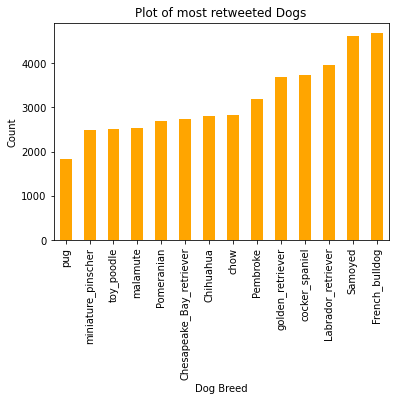

In [231]:
dogs_graph(retweets,'Plot of most retweeted Dogs','Count','Dog Breed')

### Insight 2: Most favourited dog breed

In [232]:
#inspecting dogs that get retweeted the most for insight
favourite = most_rated_dogs.groupby('p1').favorite_count.mean().sort_values()

In [233]:
favourite

p1
pug                          5930.055556
toy_poodle                   6774.270270
Pomeranian                   7535.621622
malamute                     8592.379310
Chihuahua                    8634.948718
miniature_pinscher           8947.095238
chow                         9859.536585
Chesapeake_Bay_retriever    10130.304348
Pembroke                    11304.034091
cocker_spaniel              11697.222222
Labrador_retriever          12140.879121
golden_retriever            12477.674074
Samoyed                     13574.775000
French_bulldog              17913.000000
Name: favorite_count, dtype: float64

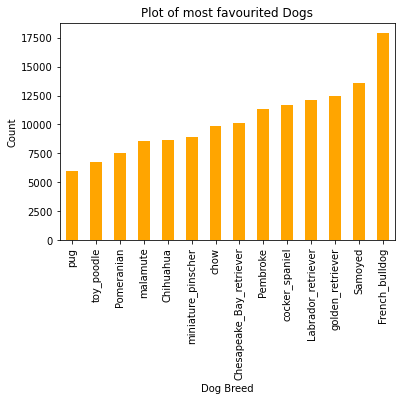

In [234]:
dogs_graph(favourite,'Plot of most favourited Dogs','Count','Dog Breed')

### Insight 3: Most rated dog breed

In [235]:
#grouping and counting the most rated dog breeds
rated_dogs = most_rated_dogs.p1.value_counts().sort_values()

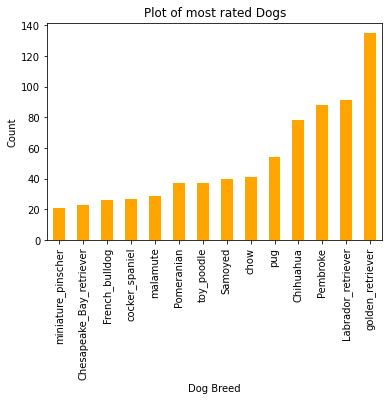

In [236]:
dogs_graph(rated_dogs,'Plot of most rated Dogs','Count','Dog Breed')

### Insights:
1. The dog that gets retweeted the most is the French Bulldog followed by the Samoyed and Labrador retriever.

2. The dog that gets the most favourites is the French Bulldog followed by the Samoyed and the Golden retriever.

3. The dogs that get rated the most on the twitter page are golden retrievers followed by labrador retrievers and Pembrokes.

### Visualization

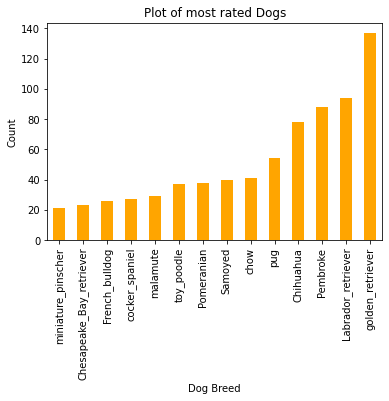

In [220]:
dogs_graph(rated_dogs,'Plot of most rated Dogs','Count','Dog Breed')